# <p style="text-align:center;"> Machine Learning & Statistics- Assessment 2019</p>

# <p style="text-align:center;"> The Boston House Price Dataset</p>

## <font color=red> Setting up the environment</font>

In [39]:
import pandas as pd #import the pandas library
import numpy as np #import the numpy library
import matplotlib.pyplot as plt #import the matplot library
import seaborn as sns #import seaborn library
import scipy as sp #import scipy
from sklearn.datasets import load_boston #load the boston house proce index from the sklearn library
from string import ascii_letters #from the string module import concatenation of the ascii upper & lower constants[3]
import scipy.stats as ss #from scipy import the statistics module


In [40]:
#rename the load_boston dataset to boston_dataset
#create a pandas dataframe from the dataset and call it boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [41]:
#Add the MEDV to the dataset
boston['MEDV'] = boston_dataset.target 

In [42]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No |Attributes     |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |
|4.   |CHAS           |Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|5.   |NOX            |nitric oxides concentration (parts per 10 million)                  |
|6.   |RM             |the average number of rooms per dwelling                            |
|7.   |AGE            |the proportion of owner-occupied units built prior to 1940          |
|8.   |DIS            |weighted distances to five Boston employment centres                |
|9.   |RAD            |index of accessibility to radial highways                           |
|10.  |TAX            |full-value property-tax rate per 10,000                             |
|11.  |PTRATIO        |the pupil-teacher ration by the town                                |
|12.  |B-1000(BK-0.63)|Where Bk is the proportion of blacks by the town                    | 
|13.  |LSTAT          |percentage lower status of the population                           |
|14.  |MEDV           |the median value of owner-occupied homes in  1000's                 |


The dataset variables can be categorised as follows :<br>

**Dependent**<br>
<br>
*target*<br>
The median value of owner-occupied houses.<br>
<br>
**Structural**<br>
<br>
*RM*<br>
The average number of rooms in owner units, it represents spaciousness and can also represent a better quality home.<br>
<br>
*AGE*<br>
This represents the proportion of houses completed before 1940.<br>
<br>
**Area**<br>
<br>
*B*<br>
This variable indicates the black proportion of the population. In 1970 you would expect where an increase in B exists would have a negative impact on house value.<br>
<br>
*LSTAT*<br>
Proportion of adults without some high-school education and proportion of male workers classified as labourers.<br>
<br>
*CRIM*<br>
Crime rate by town. We would expect that high levels of this variable would have an negative impact on prices.<br>
<br>
*ZN*<br>
Proportion of town's residential land zoned for units over 25,000 sq ft. As this restricts the construction of small lot houses, we would expect to see a positive correlation with the median value.<br>
<br>
*INDUS*<br>
This variable is the proportion of nonretail business acres per town. Noise and heavy traffic should negatively effect the house values.<br>
<br>
*TAX*<br>
Full value property tax rate ($10,000). It measures the cost of public services in each community.<br>
<br>
*PTRATIO*<br>
Measures public sector benefits in each town. A low ration should imply that each student receives more individual attention.<br>
<br>
*CHAS*<br>
This variable captures the amenities of a riverside location and therefore the coefficient should be positive.<br>
<br>
**Accessibility**<br>
<br>
*DIS*<br>
Weighted distance to 5 employment centres in the Boston region. House prices *should* be higher the nearer they are to employment centres.<br>
<br>
*RAD*<br>
The highway access index was calculate on a town basis.<br>
<br>
**Air Pollution**<br>
<br>
*NOX*<br>
Nitrogen oxide concentration in pphm (annual average concentration in parts per hundred million).<br>
<br> 


# <font color=red> Interesting Highlights</font>

<p> I was interested to investigate if there was a pattern in relation to the median house values. As you can see from the bar chart below, it is clear that the median value of the house prices are normally distributed, half of the values fall to the left of the mean and half are to the right.</p>
<p>
It is worth noting that the variable **target** appears to be censored at 50.00. Censoring is suggested by the fact that in 16 instances, the median value is exactly €50,000, while there are 15 instances have a prices between €40,000 - €50,000 [2].
</p>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

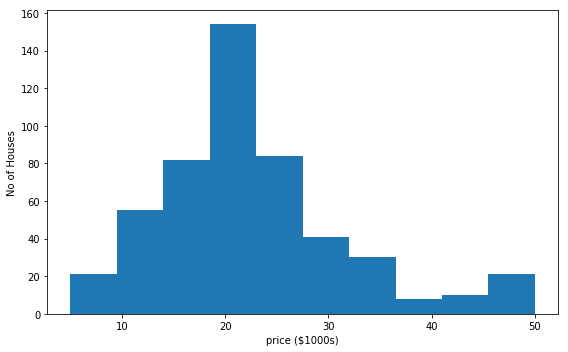

In [49]:
#Generate a histogram detailing the count of houses in each range
plt.figure(figsize=(8, 5))
plt.hist(boston_dataset.target)
plt.xlabel('price ($1000s)')
plt.ylabel('No of Houses')
plt.tight_layout()
plt.show()

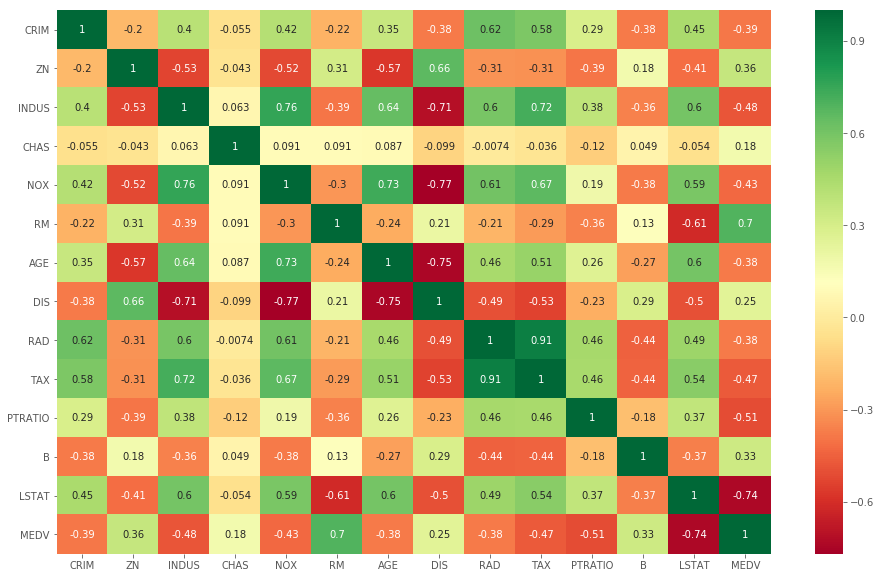

In [126]:
ax, fig = plt.subplots(figsize = (16, 10))
sns.heatmap(boston.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

<p>The heat map highlights the attributes that are closely correlated, and those that display little or no correlation at all. Correlation can be described as the degree of association between two variables</p> 
<p>The most attributes most closely linked to the median house price are average rooms per house and LSTAT- Proportion of adults without some high-school education and proportion of male workers classified as labourers. Neither of these are surprising as we would expect the number of rooms. Again it is not surprising to see that areas where the population have no high-school education live in less expensive than those who achieved a higher level of education. </p> 
<p>
It is easy to identify that houses that bound the river, or not, has the least correlation with all of the other attributes. The closer an attribute is to 0 indicates no correlation. At 0.0074 the distance to employment centres has the least impact on house prices. The strength of the linear relationship between index of accessibility to radial highways and full-value property tax-rate are the attributes is very strong at 0.91.
</p>

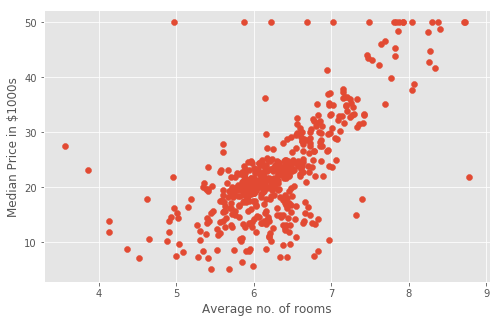

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(boston_dataset.data[:,5], boston_dataset.target)
plt.xlabel('Average no. of rooms')
plt.ylabel('Median Price in $1000s')
plt.show()

The scatter plot above clearly shows that the as the number of rooms increases the price of the house increases. This graphic also indicates that the vast majority of houses have been 5.5 and 6.5 rooms per house. We can also determine that a house with 6 rooms would likely sell for around $20,000.

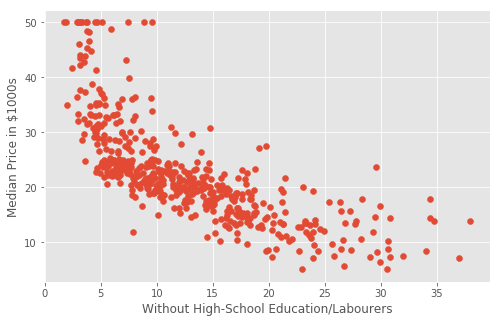

In [99]:
plt.figure(figsize=(8, 5))
plt.scatter(boston_dataset.data[:,12], boston_dataset.target)
plt.xlabel('Without High-School Education/Labourers')
plt.ylabel('Median Price in $1000s')
plt.show()

It is not surprising to see learn that areas where a high proportion of the residents have a low level of education or low skilled jobs live in less expensive houses than those areas where residents have achieved a high level of high-school education.

## Environmental impacts

I think it would be interesting to investigate if there is any correlation between the median house value and the environmental variables recorded in the dataset. I will look at the nitric oxides as well as the proximity of houses to employment centres and accessibility of highways. I believe these variables will impact on air and noise quality which could influence house prices.

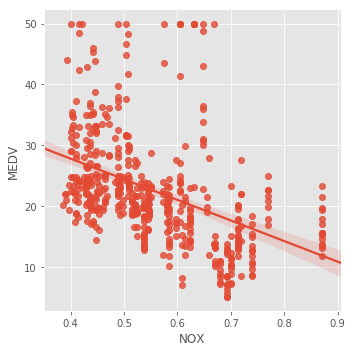

In [84]:
sns.lmplot('NOX','MEDV',boston)
plt.show()

The above graph confirms that there is a direct negative linear relationship between the house price and the level of nitric oxides recorded in the town. We can see that as the levels increase above 0.6 parts per 10 million the value of the house is at the lower end of scale.

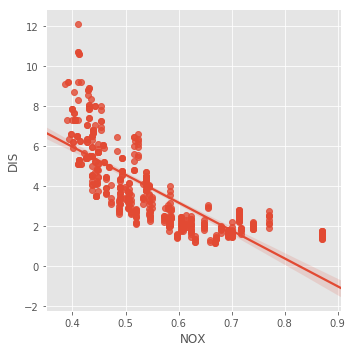

In [88]:
sns.lmplot('NOX','DIS',boston)
plt.show()

From the above graph we can tell that the closer the house is to a business center the higher the levels of nitic oxides.

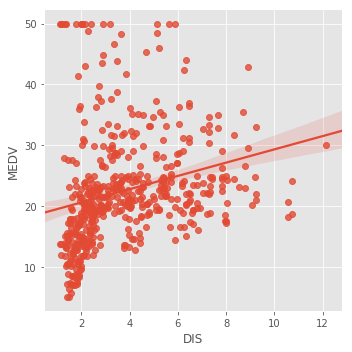

In [93]:
sns.lmplot('DIS','MEDV',boston)
plt.show()

# <font color=red><p style="text-align:center;">Prices along the Charles River</p></font>

<img src="River.png" width="600">

In [25]:
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<p>As we can see from the above tables, the vast majority (93%) of the 506 listings in the dataset did not tract the river. I grouped the means of all variables split by properties that tract the river against those that did not, this meant that there was a large disparity in median values for each category- 28.44 was the median value for properties that faced the river and 22.09 for those that did not tract the river.</p>
<p> Crime rates are also considerably lower in houses that face the river. The data would also suggest that the amenity of the river is the primary factory that drives the higher median value as the number of rooms per dwelling is only marginally higher for properties facing the river and these properties are on average 12% older that those properties that do not tract the river.</p>


In [26]:
boston.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,,
0.0,3.723215,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
1.0,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000


In [111]:
ss.ttest_ind

<function scipy.stats.stats.ttest_ind>

In [112]:
r = boston['CHAS']

In [113]:
p = boston['MEDV']

In [114]:
ss.ttest_ind(r, p)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

In [117]:
ws.ttest_ind(r,p)

(-54.92102897452029, 1.465154007235266e-305, 1010.0)

In [116]:
import statsmodels.stats.weightstats as ws

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


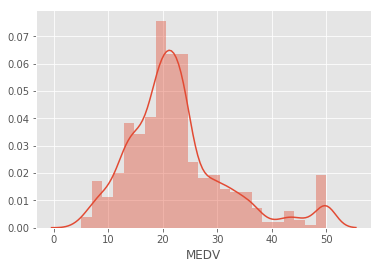

In [118]:
sns.distplot(p)

In [130]:
#create a new Dataframe with just the median house value and the River Facing Prooperties
old = pd.DataFrame(boston)
new = old[['CHAS', 'MEDV']].copy()

In [120]:
# Replace the variable indicator with string
new['CHAS'].replace(0, 'Not River Facing',inplace=True)
new['CHAS'].replace(1, 'River Facing',inplace=True)

In [121]:
ss.ttest_ind(new[new['CHAS'] == 'Not River Facing']['MEDV'], new[new['CHAS'] == 'River Facing']['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [122]:
ws.ttest_ind(new[new['CHAS'] == 'Not River Facing']['MEDV'], new[new['CHAS'] == 'River Facing']['MEDV'])

(-3.9964374660905095, 7.390623170519883e-05, 504.0)

In [66]:
x = df['CHAS']
y = df['target']
m, c = np.polyfit(x, y, 1)

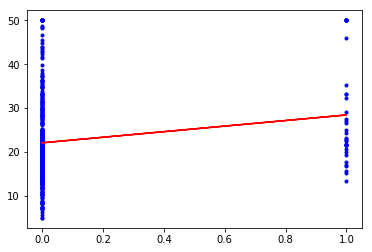

In [67]:
plt.plot(x, y, 'b.')
plt.plot(x, m * x + c, 'r-')
plt.show()

In [33]:
y = df['target']

In [34]:
import sklearn.linear_model as lm

In [48]:
m = lm.LinearRegression()

In [49]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
m.intercept_

38.11066028540406

In [51]:
m.coef_

array([-24.58862952,  -0.20301393])

In [52]:
m.score(x,y)

0.20573349786832074

In [ ]:
boston.T.plot()
plt.ylabel('target')

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


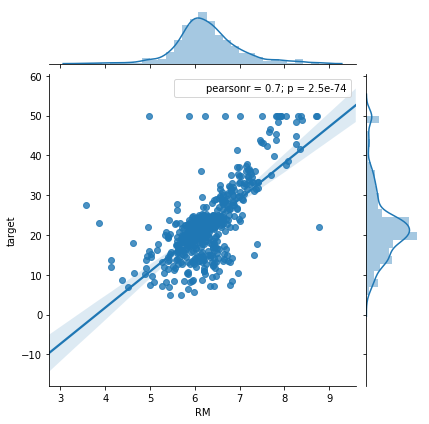

In [46]:
sns.jointplot(x='RM', y='target', data=df, kind='reg');


C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


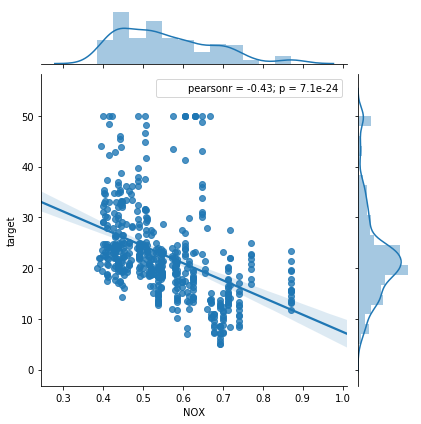

In [15]:
sns.jointplot(x='NOX', y='target', data=df, kind='reg');
plt.show();

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


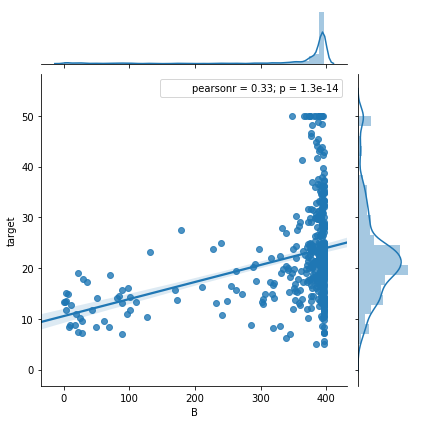

In [34]:
sns.jointplot(x='B', y='target', data=df, kind='reg');
plt.show();

# Scatter Plot

In [50]:
import seaborn as sns

In [55]:
print("Boston housing dataset has {} data points with {} variables each.".format(*df.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [62]:
import numpy.ma as ma

In [26]:
import statsmodels.api as sm

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
x = df['RM']
y = df['target']
m, c = np.polyfit(x, y, 1)

KeyError: 'RM'

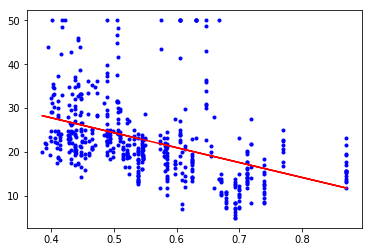

In [20]:
plt.plot(x, y, 'b.')
plt.plot(x, m * x + c, 'r-')
plt.show()

In [83]:
df = pd.DataFrame(boston.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [131]:
df['target'] = boston.target

AttributeError: 'DataFrame' object has no attribute 'target'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF8B828>,
      dtype=object)

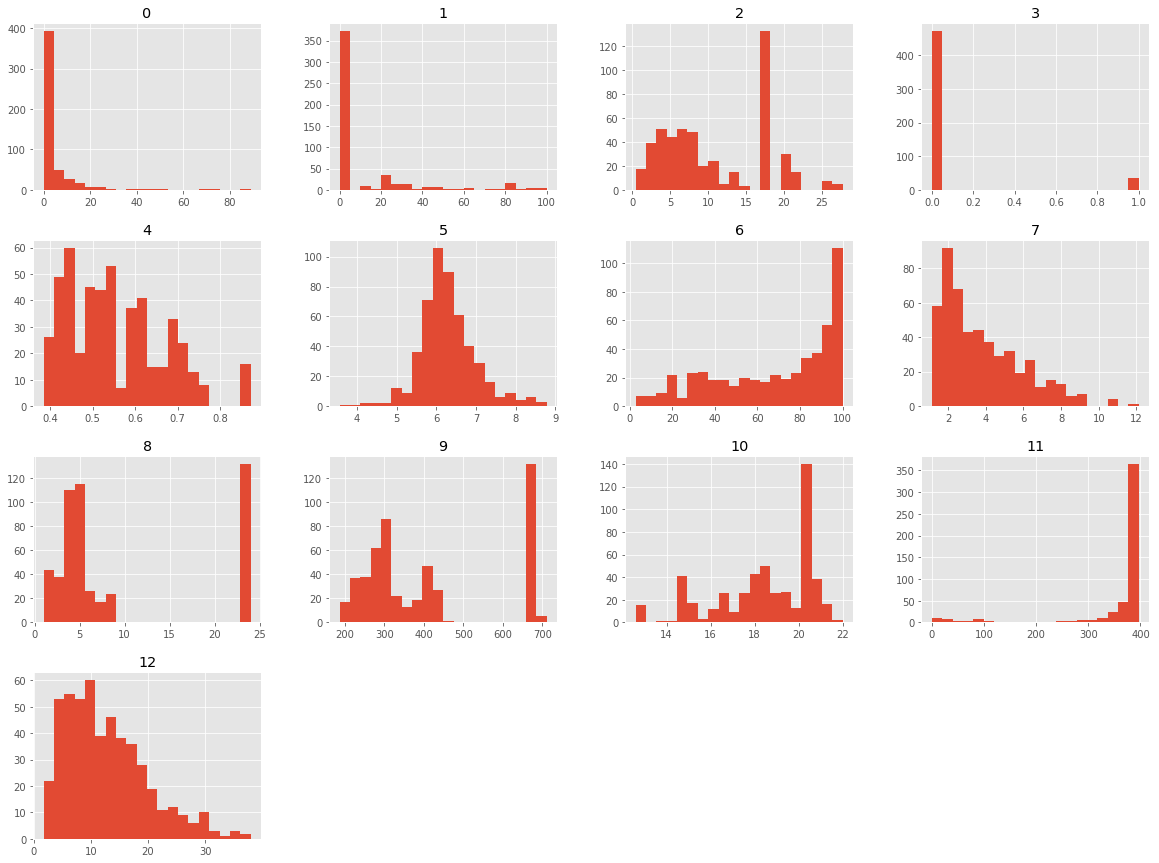

In [86]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

housing_data = load_boston()
%matplotlib inline

pd.DataFrame(housing_data['data']).hist(bins = 20, figsize = (20, 15))

<p>As the RM variable shows a linear upward relationship we will use this as a predictor for house values.</p>
Best Fit Line

In [127]:
import seaborn as sns

y(Dependant value) = mx+c. X is the independant value, m represents the slope of the line. C is the constant error. M is the slope coef and C is the intercept

Y = 9.1*5(5 rooms) - 34.67

In [141]:
X = boston[:,np.newaxis,5]
Y = boston.target

TypeError: unhashable type: 'slice'

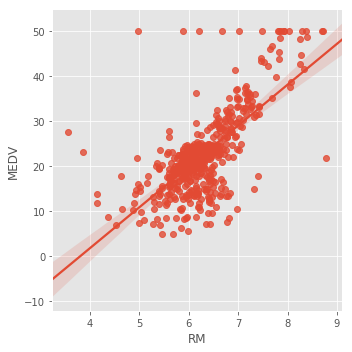

In [134]:
sns.lmplot("RM","MEDV", boston)

In [142]:
boston.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
linreg = LinearRegression()
linreg.fit(X,Y)

NameError: name 'X' is not defined

In [145]:
linreg.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [146]:
linreg.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [148]:
linreg.predict(5)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.